# Data Exploration - Day 1

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('raw_data/datos.csv', sep = ';')

/var/folders/w1/c5vl_fqd62s0210ww34jb5l80000gn/T/ipykernel_21983/2801314159.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('raw_data/datos.csv', sep = ';')


| Nombre | Descripcion | Tipo |
| --- | --- | --- |
|ContadorBajasCCC      | Número total de bajas acumuladas que tiene la empresa|Numérico|
|ContadorBajasDNI      |Nº de bajas que ha tenido el trabajador hasta el momento de estar de baja |Numérico|
|sexo                  | Sexo del trabajador|Categórico|
|cnae                  | CNAE (categoría de actividad) de la empresa en la que trabaja ese trabajador | Categorico |
|icd9                  | Tipo de enfermedad que ha clasificado el médico según categorización ICD9 | Categorico |
|recaida               | Indicador de si la baja es una recaida|Booleano |
|numtreb              | Tamaño de empresa en la que trabaja el trabajador: micropyme, pyme... | Numerico |
|codipostal            | Codigo postal| Numerico |
|contadoridiasBajasCNI | Nº de días de baja que ha estado el trabajador hasta el momento de estar de baja| Numerico |
|contracte             | Tipo de contrato del trabajador | Categorico |
|grupcoti             | Grupo de cotización del trabajador | Categorico |
|pluriempleo          | Tiene mas de un trabajo               | Booleano|
|siasemana             | Día de la semana en el que se ha producido la baja |Categórico ordinal|
|tiempo_en_empresa     | Tiempo que el trabajador lleva en la empresa | Numerico|
|edad                  | Edad del trabajador |Numerico |
|  duracion_baja          | Duración de la baja <- lo que hay que predecir | Numerico |
|mes_baja              | Mes del año en el que se ha producido la baja| categórico ordinal |
|epiweek               | Semana del año en el que se ha producido la baja | categórico ordinal|

### What does this mean?

In [47]:
df['contracte'].unique()

array([420.        , 100.        , 189.        , 402.        ,
       410.        , 289.        , 200.        , 401.        ,
       501.        , 502.        , 230.        , 130.        ,
       530.        , 139.        , 510.        , 540.        ,
       541.        , 408.        , 441.        ,   0.        ,
       215.97362571, 239.        , 520.        , 300.        ,
       389.        , 109.        , 430.        , 550.        ,
       330.        , 150.        , 421.        , 518.        ,
       418.        , 209.        , 250.        , 508.        ,
       452.        , 552.        , 350.        , 450.        ,
       404.        , 309.        ,   1.        , 999.        ,
       339.        ,  19.        , 101.        ])

### Numero total de bajas

In [56]:
df['ContadorBajasCCC'].head()

0    17664.0
1    17664.0
2    17664.0
3    17664.0
4    17664.0
Name: ContadorBajasCCC, dtype: float64

### Sexo

<AxesSubplot: xlabel='recaida', ylabel='duracion_baja'>

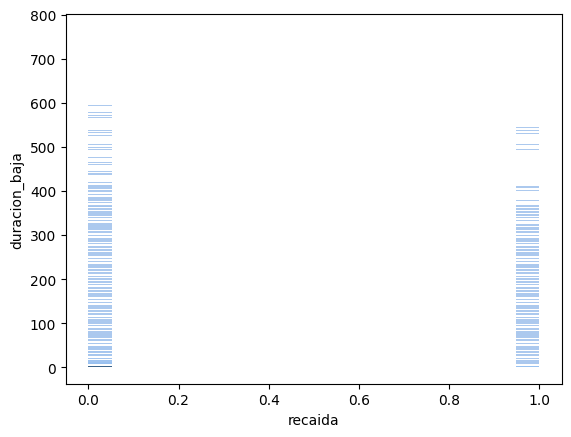

In [62]:
sns.histplot(data = df, x = 'recaida', y = 'duracion_baja')

In [28]:
sns.histplot(data = df, x = 'sexo', y = 'duracion_baja')

In [29]:
df = df.replace('-',np.nan)

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df)
  
columns = ["ContadorBajasCCC","ContadorBajasDNI","sexo","cnae","icd9","recaida","numtreb","codipostal","ContadordiasBajasDNI","contracte","grupcoti","pluriempleo","diasemana","tiempo_en_empresa","edad","duracion_baja","mes_baja","epiweek"]
X = imputer.transform(df)
df = pd.DataFrame(X, columns=columns)

# Correlation

In [31]:
df.head()

,ContadorBajasCCC,ContadorBajasDNI,sexo,cnae,icd9,recaida,numtreb,codipostal,ContadordiasBajasDNI,contracte,grupcoti,pluriempleo,diasemana,tiempo_en_empresa,edad,duracion_baja,mes_baja,epiweek
0,17664.0,30.0,2.0,5110.0,9.30,0.0,3187.0,8037.0,224.0,420.0,2.0,0.0,7.0,0.51,27.2,2.0,12.0,51.0
1,17664.0,5.0,2.0,5110.0,787.01,0.0,3187.0,39006.0,12.0,420.0,2.0,0.0,4.0,1.41,31.8,1.0,12.0,52.0
2,17664.0,17.0,2.0,5110.0,462.00,0.0,3187.0,38360.0,46.0,420.0,2.0,0.0,4.0,0.54,20.5,1.0,12.0,52.0
3,17664.0,16.0,2.0,5110.0,460.00,0.0,3187.0,8830.0,49.0,100.0,2.0,0.0,4.0,2.53,30.6,3.0,12.0,52.0
4,17664.0,7.0,1.0,5110.0,462.00,0.0,3187.0,2001.0,548.0,189.0,1.0,0.0,5.0,6.16,32.4,2.0,12.0,52.0


# HeatMap

<AxesSubplot: >

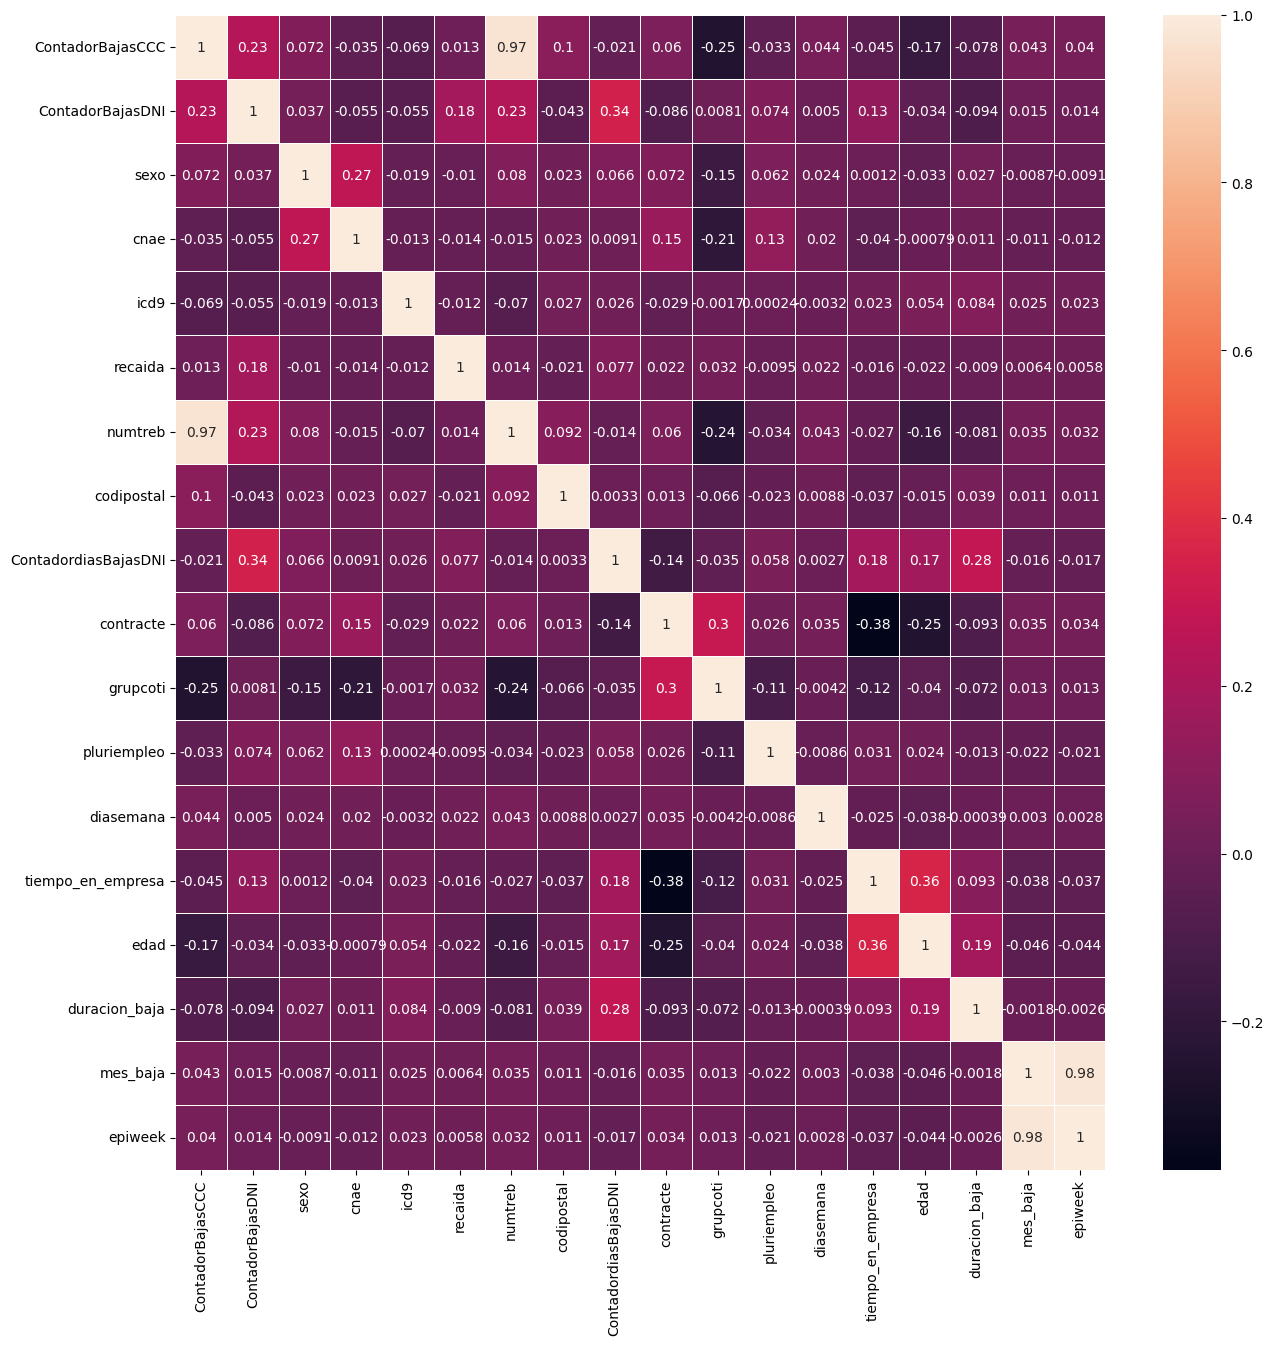

In [41]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,15))         
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

In [42]:
 df['numtreb'].nunique()

330